In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Getting the Data

In [58]:
cd "/content/drive/My Drive/Colab Notebooks/ML_Projects/Heart Disease"

/content/drive/My Drive/Colab Notebooks/ML_Projects/Heart Disease


In [59]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Features and Labels Variables

In [61]:
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#Choosing the Right Model and Hyperparameters

consulting the sklearn map and it says to try `Lineal SVC`

In [64]:
from sklearn.svm import LinearSVC
np.random.seed(42)
clf_lsvc = LinearSVC(max_iter=1000)
clf_lsvc.fit(X_train,y_train)
clf_lsvc.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5081967213114754

In [65]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier()
#keeping the default hyperparameters

#Fit the model to data

In [68]:
clf.fit(X_train,y_train);

In [69]:
y_preds = clf.predict(X_test)

In [70]:
clf.predict_proba(X_test[:5])

array([[0.92, 0.08],
       [0.11, 0.89],
       [0.3 , 0.7 ],
       [0.06, 0.94],
       [0.99, 0.01]])

#Evaluating the Model

Using `score` - Mean Accuracy

In [71]:
clf.score(X_train,y_train)

1.0

In [72]:
clf.score(X_test,y_test)

0.8524590163934426

Using the `scoring` parameters - Mean Accuracy


In [73]:
from sklearn.model_selection import cross_val_score #change the train test split multiple times

In [74]:
cross_val_score(clf,X,y,cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.8       , 0.75      ])

Classification model evaluation
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

**Accuracy**

In [75]:
print("Cross Val Accuracy: {:.2f}%".format(cross_val_score(clf,X,y,cv = 5).mean()*100))

Cross Val Accuracy: 83.14%


**ROC**
Area under curve (AUC)

Comparison of model's true positive rate and false positive rate

In [76]:
from sklearn.metrics import roc_curve

In [80]:
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_prob)

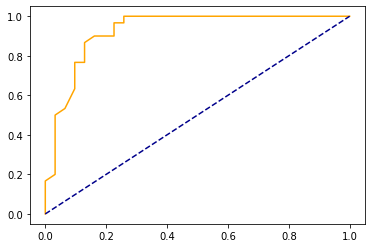

In [89]:
def plot_roc_curve(fpr,tpr):
  #ROC Curve
  plt.plot(fpr,tpr,color = "orange",label = "ROC")
  #Guessing Curve
  plt.plot([0,1],[0,1],color = 'darkblue',linestyle = '--',label = 'Guessing')
plot_roc_curve(fpr,tpr)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [17]:
confusion_matrix(y_test,y_preds)

array([[24,  7],
       [ 3, 27]])

In [18]:
accuracy_score(y_test,y_preds)

0.8360655737704918

#Improve a model

In [19]:
#trying different amount for n_estimators

In [20]:
for i in range (10,100,10):
  print(f"trying model with {i} estimator...")
  clf = RandomForestClassifier(n_estimators=i,random_state=30).fit(X_train,y_train)
  print(f"Model accuracy on test set {clf.score(X_test,y_test)*100:.2f}%")
  print(" ")

trying model with 10 estimator...
Model accuracy on test set 75.41%
 
trying model with 20 estimator...
Model accuracy on test set 86.89%
 
trying model with 30 estimator...
Model accuracy on test set 86.89%
 
trying model with 40 estimator...
Model accuracy on test set 83.61%
 
trying model with 50 estimator...
Model accuracy on test set 86.89%
 
trying model with 60 estimator...
Model accuracy on test set 88.52%
 
trying model with 70 estimator...
Model accuracy on test set 86.89%
 
trying model with 80 estimator...
Model accuracy on test set 86.89%
 
trying model with 90 estimator...
Model accuracy on test set 86.89%
 


In [21]:
#best results with 60 estimators
clf = RandomForestClassifier(n_estimators=60,random_state=30).fit(X_train,y_train)
print(f"Model accuracy on test set {clf.score(X_test,y_test)*100:.2f}%")

Model accuracy on test set 88.52%


#Save Model

In [22]:
import pickle

In [23]:
pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [24]:
loaded_model = pickle.load(open("random_forest_model_1.pk1","rb"))

In [25]:
print(f"Validation score of loaded model {loaded_model.score(X_test,y_test)*100:.2f}%")

Validation score of loaded model 88.52%
